<a href="https://colab.research.google.com/github/H12-25-L-Equipo-36/Hackaton-Flightdelay/blob/Data_science/xgboost_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 DataSet Final

Importar el data set
Importaremos el dataset final con el comando gd basado en gdown, esta biblioteca nos permite extraer el dataset alojado en la nube, este dataset fue extraido del EDA de un libro anterior donde se extrajeron solo las variables más importantes para realizar el modelado de machine learning, por este motivo se encuentra limpio de cualquier ruido, en este cuaderno se realizará:

Análisis profundo del problema presentado
Correlacíon de variables
Feature engineering
Training of Machine learning models

In [ ]:
!pip install gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
gdown.download("https://drive.google.com/uc?id=1_8Uzy9vxZr8Vl1328jWufiw4NsK_XxjN","datafinal.csv", quiet=False)
df= pd.read_csv("datafinal.csv")


Downloading...
From (original): https://drive.google.com/uc?id=1_8Uzy9vxZr8Vl1328jWufiw4NsK_XxjN
From (redirected): https://drive.google.com/uc?id=1_8Uzy9vxZr8Vl1328jWufiw4NsK_XxjN&confirm=t&uuid=a901b880-0b6e-4767-8afb-1cf1c55dc515
To: /content/datafinal.csv
100%|██████████| 247M/247M [00:02<00:00, 96.7MB/s]


# Analisis sobre el problema

Todos los que viajan en avión —y especialmente las aerolíneas y aeropuertos— sufren con retrasos.

Estos retrasos causan insatisfacción en los pasajeros, costos extras para las empresas y problemas de logística (como conexiones perdidas y reajustes de vuelos).

El cliente quiere predecir, basándose en datos del vuelo (origen, destino, hora, aerolínea, etc.), cuál es la probabilidad de que el vuelo se retrase para prepararse con antelación:

Los pasajeros pueden recibir alertas antes de salir de casa.

Las aerolíneas pueden ajustar la operación y minimizar el impacto.

Los aeropuertos pueden planificar mejor el uso de la infraestructura.

In [ ]:
df.head()

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour,distance_km,delays
0,CO,3,SFO,IAH,15.0,1.0,205,0.0,329.91,1
1,US,3,PHX,CLT,15.0,1.0,222,0.0,357.27,1
2,AA,3,LAX,DFW,20.0,1.0,165,0.0,265.54,1
3,AA,3,SFO,DFW,20.0,1.0,195,0.0,313.82,1
4,AS,3,ANC,SEA,30.0,0.0,202,0.0,325.09,0


In [ ]:
df[['hour', 'distance_km']].describe()

,hour,distance_km
count,5.788483e+06,5.788483e+06
mean,1.254504e+01,1.224462e+03
std,5.082359e+00,9.884597e+02
min,0.000000e+00,0.000000e+00
25%,8.000000e+00,4.908500e+02
50%,1.200000e+01,9.591700e+02
75%,1.700000e+01,1.630260e+03
max,2.400000e+01,8.019340e+03


# Interpretación del problema

Buscamos los datos que estan correlacionados para poder utilizarlos en el aprendizaje ML y estos datos tengan importan e impacto para que el ML muestre datos con mejor presición y dandoles un peso adecuado para su futura interacción gráficos los datos que evaluamos tanto el peso y su correlación con la variable delay, esto se hace con el fin de encontrar una correlación perfecta positiva, sin correlación y correlación negativa

In [ ]:
df.groupby('airline')['delays'].mean().std()

0.08605930250702883

In [ ]:
df.groupby('hour')['delays'].mean().sort_values()

,delays
hour,
5.0,0.149677
6.0,0.204683
7.0,0.252716
3.0,0.253821
4.0,0.270097
8.0,0.287448
9.0,0.334644
10.0,0.361841
11.0,0.382747


In [ ]:
sns.barplot(x='airline', y='delays', data=df , estimator='mean')

NameError: name 'sns' is not defined

In [ ]:
sns.boxplot(x='delays', y='hour', data=df)

In [ ]:
sns.boxplot(x='delays', y='distance_km', data=df)

Este grafico muestra la media de la probabilidad de retraso del origen y del destino demostrando que estos datos no se correlacionan si hay retraso o no

In [ ]:
pivot = pd.pivot_table(df, values='delays', index='origin', columns='destination', aggfunc='mean' )
sns.heatmap(pivot, cmap='coolwarm')

In [ ]:
sns.violinplot(x='delays', y='day_of_week', data=df, inner="quartile")

En esta grafica de barras podemos visualizar que el dia de la semana con mayor promedio de delays es el jueves y el menor el sabado

In [ ]:
day_of_week_delays = df.groupby('day_of_week')['delays'].mean().sort_values(ascending=False)

day_names_map = {
    1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves',
    5: 'Viernes', 6: 'Sábado', 7: 'Domingo'
}
day_labels = [day_names_map[day] for day in day_of_week_delays.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_delays.values, y=day_labels, hue=day_labels, palette='Blues_d', legend=False)

plt.xlim(0.34, 0.42)

plt.xlabel("Probabilidad promedio de retraso")
plt.ylabel("Día de la semana")
plt.title("Retrasos promedio por día de la semana")

plt.tight_layout()
plt.show()

En esta grafica de violin se puede visualizar que a medida que va avanzando el dia hay mas probabilidades de retraso en los vuelos

In [ ]:
sns.violinplot(x='delays', y='hour', data=df, inner="quartile")

## Conclusiones

- Se **determino el peso y correlación** de cada una de las variables
- La variable de correlación alta positiva es la hora
- La variabale de correlación alta negativa es distancia
- Usaremos las columnas de hour y day_of_week para la obtener la fecha
- Separaremos los features de X como

"airline",

"origin",

"destination",

"distance_km",

"day_of_week",

"hour"

Usaremos la variable Y

"delays"

Iniciaremos el modelado de Machine Learning a partir de estos datos


# 🤖 Machine Learning inicio de Modelado

In [ ]:
features = [
    "airline",
    "origin",
    "destination",
    "distance_km",
    "day_of_week",
    "hour"
]
x = df[features]
y = df["delays"]


In [ ]:
print(x.shape)
print(y.shape)


(5788483, 6)
(5788483,)


In [ ]:
x.head()

,airline,origin,destination,distance_km,day_of_week,hour
0,CO,SFO,IAH,329.91,3,0.0
1,US,PHX,CLT,357.27,3,0.0
2,AA,LAX,DFW,265.54,3,0.0
3,AA,SFO,DFW,313.82,3,0.0
4,AS,ANC,SEA,325.09,3,0.0


In [ ]:
df_num=df.drop(["airline","origin","destination","time","distance_mil","delay"], axis=1)

In [ ]:
df_feat=df.drop(["time","distance_mil","distance_km","delays","delay","day_of_week","hour"], axis=1)

In [ ]:
df_feat.head()

,airline,origin,destination
0,CO,SFO,IAH
1,US,PHX,CLT
2,AA,LAX,DFW
3,AA,SFO,DFW
4,AS,ANC,SEA


In [ ]:
df_num.head()

,day_of_week,hour,distance_km,delays
0,3,0.0,329.91,1
1,3,0.0,357.27,1
2,3,0.0,265.54,1
3,3,0.0,313.82,1
4,3,0.0,325.09,0


In [ ]:
corr_num=df_num.corr()
corr_num

,day_of_week,hour,distance_km,delays
day_of_week,1.000000,0.004972,0.014271,-0.008490
hour,0.004972,1.000000,0.089150,0.198938
distance_km,0.014271,0.089150,1.000000,0.048191
delays,-0.008490,0.198938,0.048191,1.000000


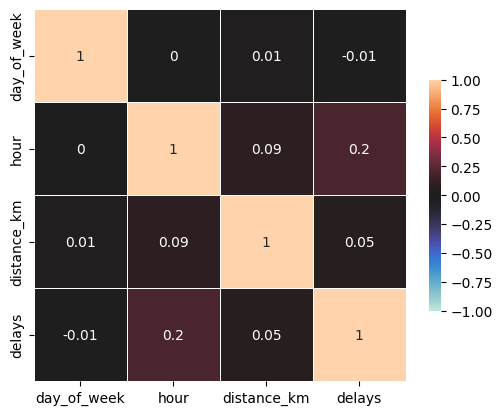

In [ ]:
fig, ax=plt.subplots(figsize=(6,6))
ax= sns.heatmap(np.round(corr_num,2),vmax=1, vmin=-1, center=0, square= True,
                linewidths=.5, annot=True, cbar_kws={"shrink":.5})

In [ ]:
categorical_features=["airline", "origin", "destination"]
numbers_features=["distance_km", "day_of_week", "hour"]

In [ ]:
categorical_features_df=df[categorical_features]
categorical_features_df.head()

,airline,origin,destination
0,CO,SFO,IAH
1,US,PHX,CLT
2,AA,LAX,DFW
3,AA,SFO,DFW
4,AS,ANC,SEA


In [ ]:
categorical_numbers_df=df[categorical_numbers]
categorical_numbers_df.head()

NameError: name 'categorical_numbers' is not defined

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
one_hot = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"),
         categorical_features),
        ("num", StandardScaler(), numbers_features)
    ]
)

In [ ]:
one_hot= ColumnTransformer(
   transformers=[("cat", OneHotEncoder(handle_unknown= "ignore"), categorical_features),
                 ("num","passthrough",numbers_features)
])


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model_lrg= Pipeline (steps=[("preprocess",one_hot),
                                 ("classfier",LogisticRegression(max_iter=2000,class_weight='balanced'))])

In [ ]:
model_lrg.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4630786, 6)
(1157697, 6)
(4630786,)
(1157697,)


In [ ]:
y_pred= model_light.predict(x_train_small)

NameError: name 'model_light' is not defined

In [ ]:
result_lrg = val_cross(model_lrg, x_train, y_train)

In [ ]:
confidence_interval(result_lrg)

('Intervalo de confianza(test_recall): [ 0.611', ' 0.614]')

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_lrg= model_lrg.predict(x_test)
conf_mtx= confusion_matrix(y_test, y_predict_custom)
conf_mtx

array([[252247, 461294],
       [ 76922, 367234]])

In [ ]:
y_prob = model_lrg.predict_proba(x_test)[:,1]
y_predict_custom= (y_prob>=0.4).astype(int)

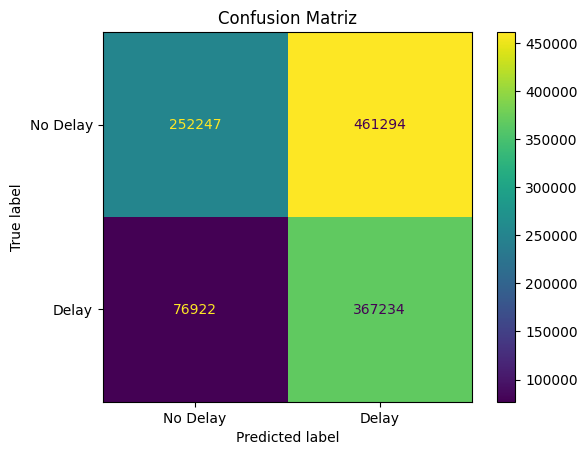

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_m = ConfusionMatrixDisplay(confusion_matrix=conf_mtx,
                           display_labels=["No Delay", "Delay"])
confusion_m.plot()
plt.title("Confusion Matriz")
plt.show()

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(
    conf_mtx,
    annot=True,
    fmt='d',
    xticklabels=['No Delay','Delay'],
    yticklabels=['No Delay','Delay']
)
plt.xlabel('Predicción')
plt.ylabel('Valor verdadero')
plt.title('Matriz de Confusión - RG')
plt.show

NameError: name 'conf_mtx' is not defined

<Figure size 600x500 with 0 Axes>

In [ ]:
from  sklearn.metrics import confusion_matrix
confusion_mtx= confusion_matrix(y_train_small, y_pred, normalize='true')
confusion_mtx


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,
                           display_labels=["No Delay", "Delay"])
cm.plot()
plt.title("Confusion Matriz")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_train_small, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Logistic Regression")
plt.legend()
plt.show()

NameError: name 'y_train_small' is not defined

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_predict_custom)

array([[252247, 461294],
       [ 76922, 367234]])

In [ ]:
classification_report(y_test, y_predict_custom)

'              precision    recall  f1-score   support\n\n           0       0.77      0.35      0.48    713541\n           1       0.44      0.83      0.58    444156\n\n    accuracy                           0.54   1157697\n   macro avg       0.60      0.59      0.53   1157697\nweighted avg       0.64      0.54      0.52   1157697\n'

In [ ]:
from pandas.core.indexes.base import maybe_extract_name
from sklearn.model_selection import StratifiedKFold, cross_validate

def val_cross (model, x,y):
  skf= StratifiedKFold(n_splits=3,
                       shuffle=True,
                       random_state=785
                       )
  resultados= cross_validate(
      model,
      x,
      y,
      cv=skf,
      scoring=["precision","recall","accuracy","f1"],
      n_jobs= 1
  )
  return resultados

def confidence_interval(resultado, metrica="test_recall"):
  mean= resultado[metrica].mean()
  std= resultado[metrica].std()
  return(
      f'Intervalo de confianza({metrica}): '
      f'[{max(mean-2*std,0): .3f}',
      f'{min(mean+2*std,1): .3f}]'
  )



In [ ]:
from sklearn.metrics import recall_score
recall_train = recall_score(
y_train,(model_lrg.predict_proba(x_train)[:,1]>=0.4)
)
recall_test= recall_score(
y_test,(model_lrg.predict_proba(x_test)[:,1]>=0.4)
)
print(recall_train, recall_test)

0.8269656381991912 0.8268131017030053


In [ ]:
example= x_test.iloc[[0]]
model_lrg.predict_proba(example)

array([[0.28607459, 0.71392541]])

In [ ]:

model_lrg.predict_proba(x_test.tail(10))

array([[0.38930269, 0.61069731],
       [0.51374242, 0.48625758],
       [0.7255575 , 0.2744425 ],
       [0.39695476, 0.60304524],
       [0.21792786, 0.78207214],
       [0.56704944, 0.43295056],
       [0.59636049, 0.40363951],
       [0.33791546, 0.66208454],
       [0.4565637 , 0.5434363 ],
       [0.46604427, 0.53395573]])

In [ ]:
model_lrg.predict_proba(x_test.head(10))

array([[0.28607459, 0.71392541],
       [0.77134013, 0.22865987],
       [0.36928965, 0.63071035],
       [0.32331017, 0.67668983],
       [0.40460986, 0.59539014],
       [0.6271103 , 0.3728897 ],
       [0.5880993 , 0.4119007 ],
       [0.33610673, 0.66389327],
       [0.57401887, 0.42598113],
       [0.48126475, 0.51873525]])

In [ ]:
model_lrg.predict(x_test.iloc[:,:])

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
df.head()

,airline,day_of_week,origin,destination,time,delay,distance_mil,hour,distance_km,delays
0,CO,3,SFO,IAH,15.0,1.0,205,0.0,329.91,1
1,US,3,PHX,CLT,15.0,1.0,222,0.0,357.27,1
2,AA,3,LAX,DFW,20.0,1.0,165,0.0,265.54,1
3,AA,3,SFO,DFW,20.0,1.0,195,0.0,313.82,1
4,AS,3,ANC,SEA,30.0,0.0,202,0.0,325.09,0


In [ ]:
vuelo_pb1=pd.DataFrame([{
"airline": "AA",
"origin":"LAX",
"destination":"OLT",
"distance_km": 460,
"day_of_week": 3,
"hour": 8
}])

In [ ]:
vuelo_pb2=pd.DataFrame([{
"airline": "US",
"origin":"SFO",
"destination":"SEA",
"distance_km": 2000,
"day_of_week": 6,
"hour": 20
}])

In [ ]:

for i, vuelo in enumerate([vuelo_pb1,vuelo_pb2], start=1):
  prob= model_lrg.predict_proba(vuelo)[0,1]
  pred= int(prob >=0.4)
  print(f"Vuelo {i}: ")
  print(f"  La probabilidad de delay es: {prob: .2f}")
  print (f" Prediccion final: {'Delay' if pred else 'No Delay'}\n")

Vuelo 1: 
  La probabilidad de delay es:  0.30
 Prediccion final: No Delay

Vuelo 2: 
  La probabilidad de delay es:  0.62
 Prediccion final: Delay



In [ ]:
vuelo = {
    "airline": "US",
    "origin": "SFO",
    "destination": "SEA",
    "distance_km": 2000,
    "day_of_week": 6
}

In [ ]:
for hour in [3,6,10,14,19,23]:
  vuelo_prob = pd.DataFrame([{**vuelo, "hour": hour}])
  prob = model_lrg.predict_proba(vuelo_prob)[0,1]
  print(f"Hora: {hour}, Probabilidad de retraso: {prob:.2f}")

Hora: 3, Probabilidad de retraso: 0.28
Hora: 6, Probabilidad de retraso: 0.33
Hora: 10, Probabilidad de retraso: 0.41
Hora: 14, Probabilidad de retraso: 0.49
Hora: 19, Probabilidad de retraso: 0.60
Hora: 23, Probabilidad de retraso: 0.68


In [ ]:
model_lrg.score(x_test, y_test)

0.6185962302744155

In [ ]:
import joblib
joblib.dump(model_lrg, "predictor_delay.pkl")

['predictor_delay.pkl']

In [ ]:
import joblib
model = joblib.load('predictor_delay.pkl')

In [ ]:
model.score(x_test, y_test)

0.6185962302744155

In [ ]:
# @title


#XG BOOST TRAINING

In [ ]:
for col in x_train.select_dtypes(include="object").columns:
    print(col, x_train[col].nunique())

airline 20
origin 336
destination 336


In [ ]:
x_train.head()

,airline,origin,destination,distance_km,day_of_week,hour
3373060,WN,MSY,BWI,1606.12,3,9.0
4040624,MQ,PIT,ORD,664.66,1,12.0
4103353,HA,OAK,OGG,3780.34,5,6.0
4028706,F9,MEM,IAD,1194.13,7,16.0
144567,OO,DEN,MLI,193.12,4,6.0


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix

In [ ]:
set(x_train.index).intersection(x_test.index)

set()

In [ ]:
df_retrasos = df[df['delay'] == 1]
df_a_tiempo = df[df['delay'] == 0].sample(n=len(df_retrasos), random_state=42)
df_bal = pd.concat([df_retrasos, df_a_tiempo]).sample(frac=1, random_state=42)

In [ ]:
x_train= df_bal.drop('delay', axis=1)
y_train = df_bal['delay']

In [ ]:
x_train_transformed = one_hot.fit_transform(x_train)

In [ ]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [ ]:
model_xgb.fit(x_train_transformed, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:44:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_prob_xgb = model_xgb.predict_proba(x_train_transformed)[:, 1]

In [ ]:
y_pred_xgb = (y_prob_xgb >= 0.4).astype(int)

In [ ]:
print(f"Recall con XGBoost: {recall_score(y_train, y_pred_xgb):.4f}")
print("\nMatriz de Confusion:")
print(confusion_matrix(y_train, y_pred_xgb))

Recall con XGBoost: 0.8789

Matriz de Confusion:
[[ 98613 287761]
 [ 46787 339587]]


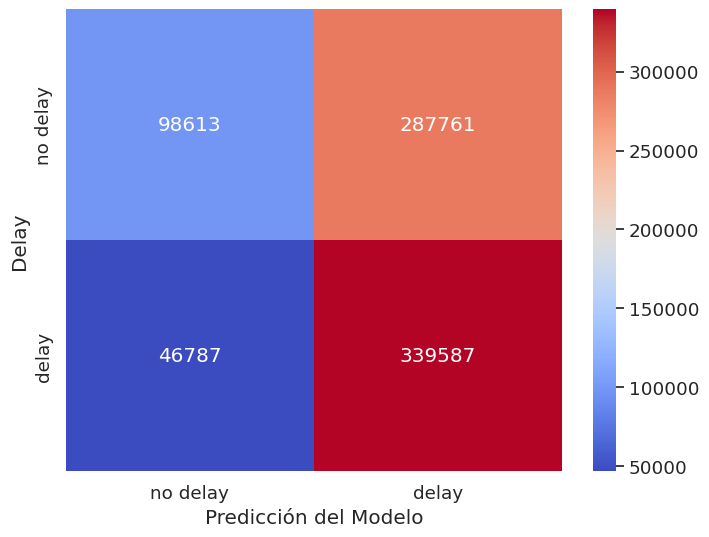

In [ ]:
labels = ['no delay', 'delay']

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

sns.heatmap(confusion_matrix(y_train, y_pred_xgb),
           annot=True,
            fmt='d',
            cmap='coolwarm',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicción del Modelo')
plt.ylabel('Delay')
plt.show()

In [ ]:
for i, vuelo in enumerate([vuelo_pb1,vuelo_pb2], start=1):
  prob= model_xgb.predict_proba(vuelo)[0,1]
  pred= int(prob >=0.4)
  print(f"Vuelo {i}: ")
  print(f"  La probabilidad de delay es: {prob: .2f}")
  print (f" Prediccion final: {'Delay' if pred else 'No Delay'}\n")


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:airline: object, origin: object, destination: object

In [ ]:
for i, vuelo in enumerate([vuelo_pb1, vuelo_pb2], start=1):
    # PASO CLAVE: Transformar el vuelo de texto a números
    vuelo_transformado = one_hot.transform(vuelo)

    # Ahora usamos el vuelo transformado en el modelo
    prob = model_xgb.predict_proba(vuelo_transformado)[0, 1]
    pred = int(prob >= 0.4)

    print(f"Vuelo {i}: ")
    print(f" La probabilidad de delay es: {prob:.2f}")
    print(f" Prediccion final: {'Delay' if pred else 'No Delay'}\n")

Vuelo 1: 
 La probabilidad de delay es: 0.52
 Prediccion final: Delay

Vuelo 2: 
 La probabilidad de delay es: 0.48
 Prediccion final: Delay



/tmp/ipython-input-2817849125.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=feature_importance_df.head(10), palette='viridis')


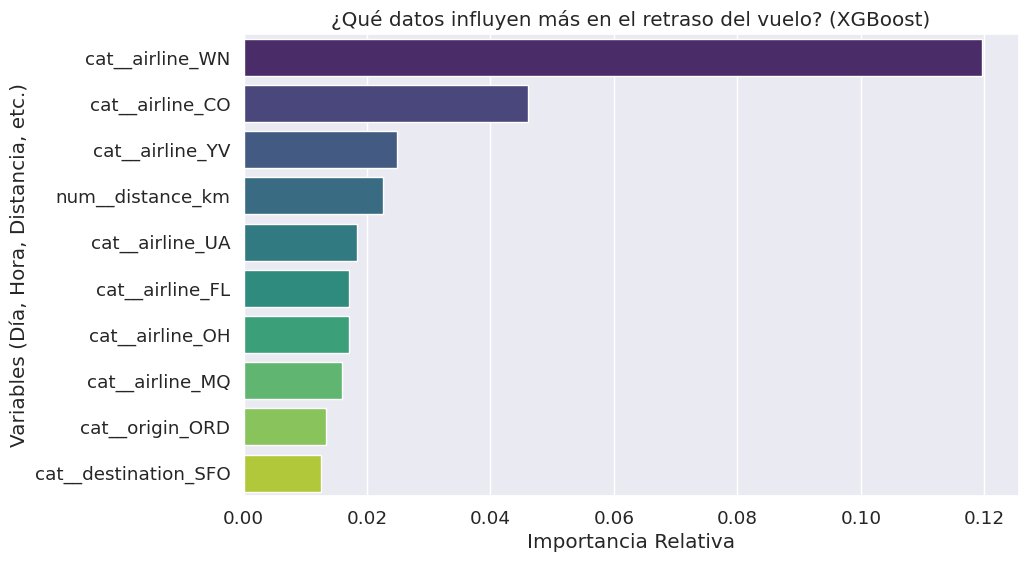

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Extraemos las importancias y los nombres de las columnas
# Nota: Si usaste un preprocessor, necesitamos obtener los nombres de las columnas transformadas
importances = model_xgb.feature_importances_

# Intentamos obtener los nombres de las columnas del preprocesador
try:
    feature_names =one_hot.get_feature_names_out()
except:
    # Si no, usamos los del X_bal (esto depende de tu versión de sklearn)
    feature_names = x_train.columns

# 2. Creamos un DataFrame para graficar fácilmente
feature_importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# 3. Graficamos el Top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=feature_importance_df.head(10), palette='viridis')

plt.title('¿Qué datos influyen más en el retraso del vuelo? (XGBoost)')
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables (Día, Hora, Distancia, etc.)')
plt.show()

#XGBOOST TRAINING 2

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)
df_delay = train_data[train_data['delays'] == 1]
df_no_delay = train_data[train_data['delays'] == 0].sample(n=len(df_delay), random_state=42)
df_train_bal = pd.concat([df_delay, df_no_delay]).sample(frac=1, random_state=42)

In [ ]:
x_train_bal = df_train_bal.drop('delays', axis=1)
y_train_bal = df_train_bal['delays']

In [ ]:
x_train_transformed = one_hot.fit_transform(x_train_bal)
x_test_transformed = one_hot.transform(x_test)

In [ ]:
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [ ]:
model_xgb.fit(x_train_transformed, y_train_bal)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:45:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = (y_prob_xgb >= 0.4).astype(int)


In [ ]:
# 1. Obtenemos las probabilidades usando el set balanceado transformado
y_prob_xgb = model_xgb.predict_proba(x_train_transformed)[:, 1]

# 2. Aplicamos el umbral
y_pred_xgb = (y_prob_xgb >= 0.4).astype(int)

# 3. EVALUACIÓN (Usamos y_train_bal porque mide lo mismo: 772,748)
from sklearn.metrics import recall_score, confusion_matrix

# IMPORTANTE: Ambos deben ser y_train_bal aquí para que no de error de tamaño
rec = recall_score(y_train_bal, y_pred_xgb)
cm = confusion_matrix(y_train_bal, y_pred_xgb)

print(f"✅ Recall con XGBoost: {rec:.4f}")
print("\nMatriz de Confusion:")
print(cm)

✅ Recall con XGBoost: 0.8633

Matriz de Confusion:
[[ 631741 1144883]
 [ 242812 1533812]]


/tmp/ipython-input-4041198046.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


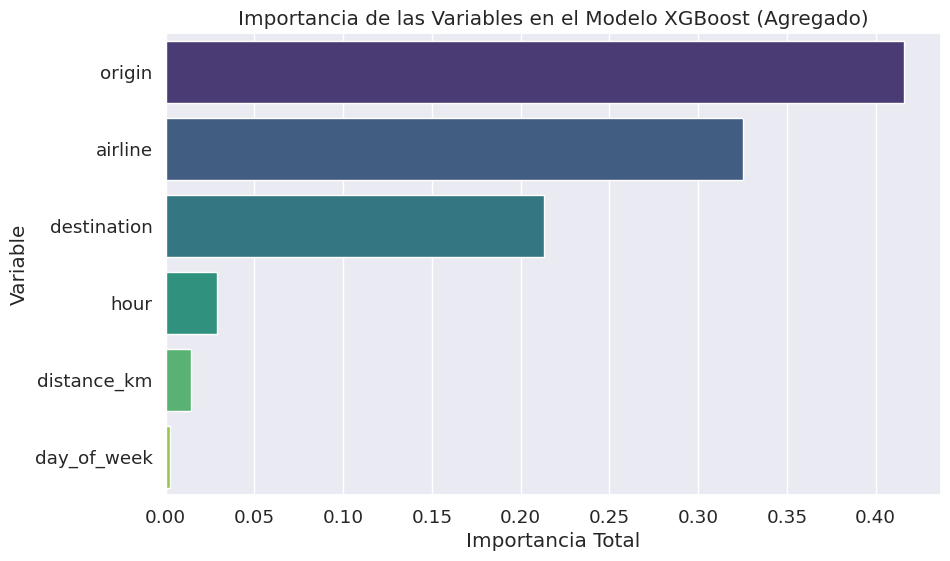

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Obtener los nombres de las características transformadas y sus importancias
feature_names_transformed = one_hot.get_feature_names_out()
importances = model_xgb.feature_importances_

# 2. Crear un diccionario para agrupar las importancias por la variable original en 'features'
# Inicializar con las características numéricas y categóricas que nos interesan
aggregated_importances = {feature: 0 for feature in features}

# Sumar las importancias para cada variable original
for i, transformed_name in enumerate(feature_names_transformed):
    # Handle categorical features
    if transformed_name.startswith('cat__airline_'):
        aggregated_importances['airline'] += importances[i]
    elif transformed_name.startswith('cat__origin_'):
        aggregated_importances['origin'] += importances[i]
    elif transformed_name.startswith('cat__destination_'):
        aggregated_importances['destination'] += importances[i]
    # Handle numerical features
    elif transformed_name.startswith('num__distance_km'):
        aggregated_importances['distance_km'] += importances[i]
    elif transformed_name.startswith('num__day_of_week'):
        aggregated_importances['day_of_week'] += importances[i]
    elif transformed_name.startswith('num__hour'):
        aggregated_importances['hour'] += importances[i]

# 3. Crear un DataFrame para graficar fácilmente
feature_importance_df_agg = pd.DataFrame(
    list(aggregated_importances.items()), columns=['Variable', 'Importancia']
).sort_values(by='Importancia', ascending=False)

# 4. Graficar
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importancia', y='Variable', data=feature_importance_df_agg, palette='viridis'
)
plt.title('Importancia de las Variables en el Modelo XGBoost (Agregado)')
plt.xlabel('Importancia Total')
plt.ylabel('Variable')
plt.show()

In [ ]:
vuelo_pb1=pd.DataFrame([{
"airline": "AA",
"origin":"S",
"destination":"OLT",
"distance_km": 460,
"day_of_week": 3,
"hour": 8
}])

In [ ]:
vuelo_pb2=pd.DataFrame([{
"airline": "US",
"origin":"S",
"destination":"SEA",
"distance_km": 2000,
"day_of_week": 6,
"hour": 20
}])

In [ ]:
for i, vuelo in enumerate([vuelo_pb1, vuelo_pb2], start=1):
    # PASO CLAVE: Transformar el vuelo de texto a números
    vuelo_transformado = one_hot.transform(vuelo)

    # Ahora usamos el vuelo transformado en el modelo
    prob = model_xgb.predict_proba(vuelo_transformado)[0, 1]
    pred = int(prob >= 0.4)

    print(f"Vuelo {i}: ")
    print(f" La probabilidad de delay es: {prob:.2f}")
    print(f" Prediccion final: {'Delay' if pred else 'No Delay'}\n")

Vuelo 1: 
 La probabilidad de delay es: 0.32
 Prediccion final: No Delay

Vuelo 2: 
 La probabilidad de delay es: 0.61
 Prediccion final: Delay



In [ ]:
model_xgb = pipeline.named_steps["xgb"]

NameError: name 'pipeline' is not defined

In [ ]:
booster = model_xgb.get_booster()
importance = booster.get_score(importance_type="gain")

In [ ]:
importance_df = (
    pd.DataFrame(importance.items(), columns=["feature", "gain"])
      .sort_values("gain", ascending=False)
)

In [ ]:
importance_df

,feature,gain
17,f17,2372.820312
14,f14,1923.476562
236,f694,690.776855
116,f318,516.057312
4,f4,507.848938
...,...,...
161,f476,1.366852
214,f633,0.833619
156,f449,0.652519
133,f382,0.645671


In [ ]:
booster

In [ ]:
'''
from pandas.core.indexes.base import maybe_extract_name
from sklearn.model_selection import StratifiedKFold, cross_validate

def val_cross (model, x,y):
  skf= StratifiedKFold(n_splits=3,
                       shuffle=True,
                       random_state=785
                       )
  resultados= cross_validate(
      model,
      x,
      y,
      cv=skf,
      scoring=["precision","recall","accuracy","f1"],
      n_jobs= 1
  )
  return resultados

def confidence_interval(resultado, metrica="test_recall"):
  mean= resultado[metrica].mean()
  std= resultado[metrica].std()
  return(
      f'Intervalo de confianza({metrica}): '
      f'[{max(mean-2*std,0): .3f}',
      f'{min(mean+2*std,1): .3f}]'
  )



In [ ]:
val_cross(model_xgb, x_train_transformed, y_train_bal)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:02:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:03:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:04:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'fit_time': array([43.25995016, 26.19424725, 27.5731144 ]),
 'score_time': array([6.43721533, 5.19970751, 5.37289739]),
 'test_precision': array([0.64195592, 0.64152851, 0.64348619]),
 'test_recall': array([0.61919292, 0.61825744, 0.61579884]),
 'test_accuracy': array([0.63692233, 0.63639465, 0.6373124 ]),
 'test_f1': array([0.63036899, 0.62967804, 0.62933814])}

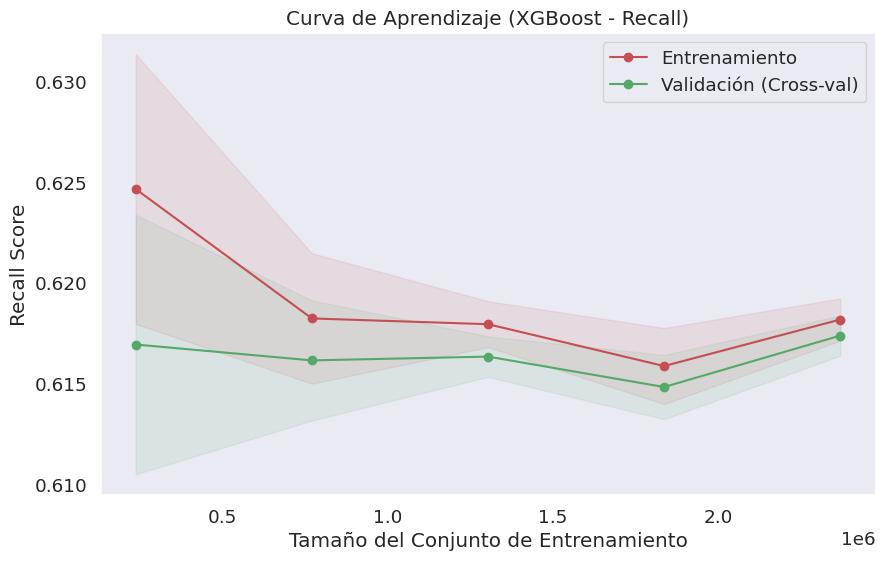

In [ ]:
from sklearn.model_selection import learning_curve

# --- PASO 1: Generar los datos (Esto crea train_scores y test_scores) ---
# Usamos una muestra pequeña (cv=3) para que no tarde demasiado
train_sizes, train_scores, test_scores = learning_curve(
    model_xgb,
    x_train_transformed,
    y_train_bal,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)
# Calculamos promedios y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Validación (Cross-val)")

# Sombreado de la varianza
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Curva de Aprendizaje (XGBoost - Recall)")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Recall Score")
plt.legend(loc="best")
plt.grid()
plt.show()

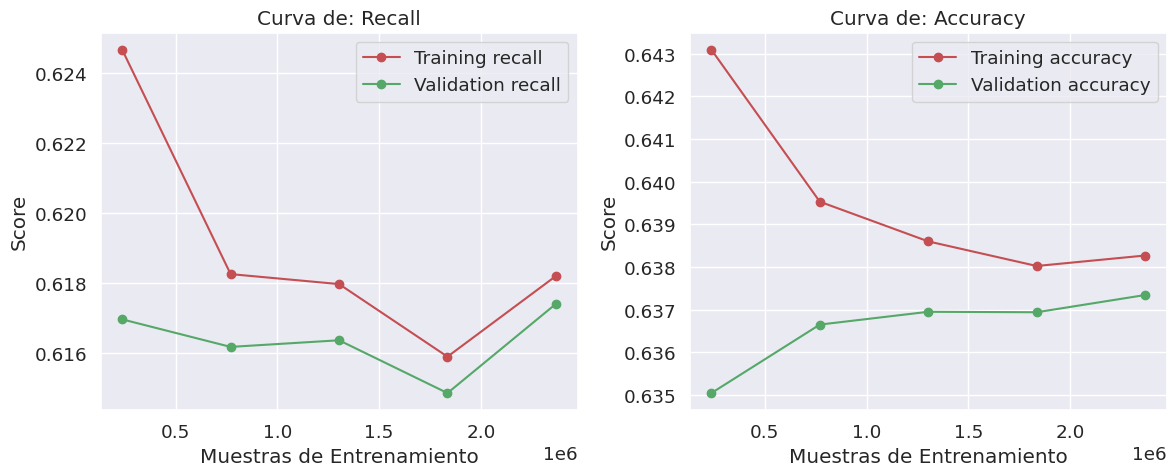

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Definimos las métricas que queremos rastrear
metrics = ['recall', 'accuracy']
plt.figure(figsize=(12, 5))

for i, metric in enumerate(metrics, 1):
    train_sizes, train_scores, test_scores = learning_curve(
        model_xgb, x_train_transformed, y_train_bal,
        cv=3, scoring=metric, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    plt.subplot(1, 2, i)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label=f"Training {metric}")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label=f"Validation {metric}")

    plt.title(f"Curva de: {metric.capitalize()}")
    plt.xlabel("Muestras de Entrenamiento")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
result= model_xgb.evals_result()

XGBoostError: No evaluation result, `eval_set` is not used during training.

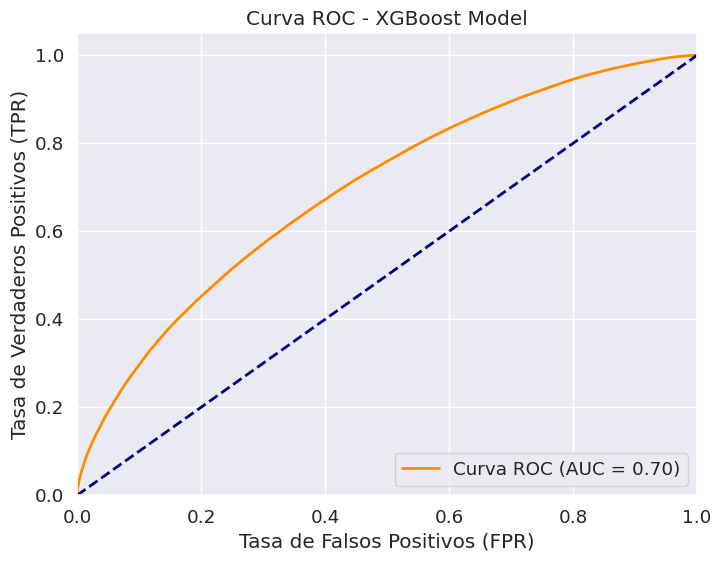

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva
y_prob_xgb_test = model_xgb.predict_proba(x_test_transformed)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb_test)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - XGBoost Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

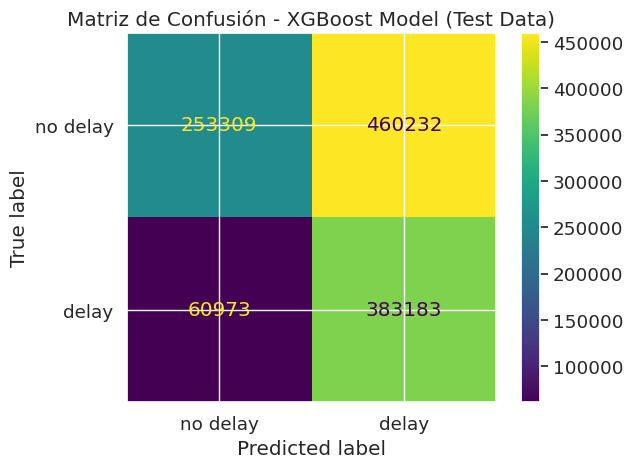

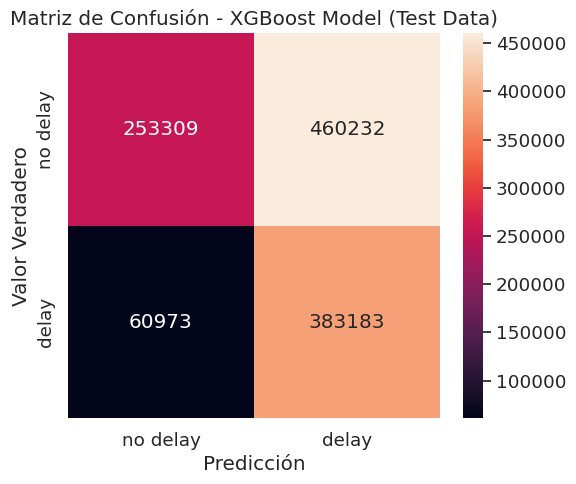

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las probabilidades de predicción para la clase positiva en el conjunto de prueba
y_prob_xgb_test = model_xgb.predict_proba(x_test_transformed)[:, 1]

# Aplicar un umbral (por ejemplo, 0.4) para obtener las predicciones binarias
y_pred_xgb_test = (y_prob_xgb_test >= 0.4).astype(int)

# Calcular la matriz de confusión
conf_mtx_xgb = confusion_matrix(y_test, y_pred_xgb_test)

# Mostrar la matriz de confusión usando ConfusionMatrixDisplay
cm_display_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_mtx_xgb,
                                      display_labels=labels)
cm_display_xgb.plot()
plt.title('Matriz de Confusión - XGBoost Model (Test Data)')
plt.show()

# Mostrar la matriz de confusión usando un heatmap de seaborn para una mejor visualización
plt.figure(figsize=(6,5))
sns.heatmap(
    conf_mtx_xgb,
    annot=True,
    fmt='d',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel('Predicción')
plt.ylabel('Valor Verdadero')
plt.title('Matriz de Confusión - XGBoost Model (Test Data)')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(model_xgb, 'predictor_delay_xgb.pkl')

['predictor_delay_xgb.pkl']

In [ ]:
from sklearn.pipeline import Pipeline
import joblib


full_model = Pipeline([
    ('one_hot', one_hot),
    ('model', model_xgb)
])


joblib.dump(full_model, 'modelo_completo_vuelos.pkl')

['modelo_completo_vuelos.pkl']

In [ ]:
pip show xgboost

Name: xgboost
Version: 3.1.2
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 
